Image has to be non-transparent and in PNG file format for now.

# Welcome to the stego project written in Python! 

With this project, we will take a picture and see what kind of data we can hide inside of it, using python stego tools!

##Imports

The first thing to do is ensure that we install and import all the dependancies that we will need in order to run this project

In [1]:
#import all the required libraries
import cv2
import numpy as np
import types
from time import sleep
from google.colab.patches import cv2_imshow #Google colab crashes if you try to display 
#image using cv2.imshow() thus use this import

# Encode / decode text in a picture

## Functions

In [ ]:
def messageToBinary(message):
  if type(message) == str:
    return ''.join([ format(ord(i), "08b") for i in message ])
  elif type(message) == bytes or type(message) == np.ndarray:
    return [ format(i, "08b") for i in message ]
  elif type(message) == int or type(message) == np.uint8:
    return format(message, "08b")
  else:
    raise TypeError("Input type not supported")

# Function to hide the secret message into the image
def hideData(image, secret_message):

  # calculate the maximum bytes to encode
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("Maximum bytes to encode:", n_bytes)

  #Check if the number of bytes to encode is less than the maximum bytes in the image
  if len(secret_message) > n_bytes:
      raise ValueError("Error encountered insufficient bytes, need bigger image or less data !!")
  
  secret_message += "#####" # you can use any string as the delimeter

  data_index = 0
  # convert input data to binary format using messageToBinary() fucntion
  binary_secret_msg = messageToBinary(secret_message)

  data_len = len(binary_secret_msg) #Find the length of data that needs to be hidden
  for values in image:
      for pixel in values:
          # convert RGB values to binary format
          r, g, b = messageToBinary(pixel)
          # modify the least significant bit only if there is still data to store
          if data_index < data_len:
              # hide the data into least significant bit of red pixel
              pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # hide the data into least significant bit of green pixel
              pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # hide the data into least significant bit of  blue pixel
              pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          # if data is encoded, just break out of the loop
          if data_index >= data_len:
              break

  return image


def showData(image):
  binary_data = ""
  for values in image:
      for pixel in values:
          r, g, b = messageToBinary(pixel) #convert the red,green and blue values into binary format
          binary_data += r[-1] #extracting data from the least significant bit of red pixel
          binary_data += g[-1] #extracting data from the least significant bit of red pixel
          binary_data += b[-1] #extracting data from the least significant bit of red pixel
  # split by 8-bits
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
  # convert from bits to characters
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      #sleep(.01)                            # will run too fast for the notebook otherwise, can probably change this when implimented outside of the google colab
      if decoded_data[-5:] == "#####": #check if we have reached the delimeter which is "#####"
          break
  # print(decoded_data)
  return decoded_data[:-5] #remove the delimeter to show the original hidden message


# Encode data into image 
def encode_text(): 
  image_name = input("Enter image name(with extension): ") 
  image = cv2.imread(image_name) # Read the input image using OpenCV-Python.
  # It is a library of Python bindings designed to solve computer vision problems. 
  
  #details of the image
  print("The shape of the image is: ",image.shape) # check the shape of image to calculate the number of bytes in it
  print("The original image is as shown below: ")
  resized_image = cv2.resize(image, (500, 500)) # resize the image as per your requirement                                      # might need to fix this here
  
  data = input("Enter data to be encoded : ")                                                                                   # user types in message that they want to hide inside the picture
  if (len(data) == 0): 
    raise ValueError('Data is empty') # Incase the user trys to get smart and enter nothing, smh 
  
  filename = input("Enter the name of new encoded image(with extension): ")
  encoded_image = hideData(image, data) # call the hideData function to hide the secret message into the selected image
  cv2.imwrite(filename, encoded_image)
  cv2_imshow(resized_image) # display the image                                                                                # commented out because gets hung up here for some reason
  print("encode done")


# Decode the data in the image 
def decode_text():
  # read the image that contains the hidden image
  image_name = input("Enter the name of the steganographed image that you want to decode (with extension) :") 
  image = cv2.imread(image_name) #read the image using cv2.imread() 

  print("The Steganographed image is as shown below: ")
  resized_image = cv2.resize(image, (500, 500))  #resize the original image as per your requirement
  cv2_imshow(resized_image) #display the Steganographed image
    
  text = showData(image)
  return text


# Image Steganography         
def Steganography(): 
    a = input("Image Steganography \n 1. Encode the data \n 2. Decode the data \n Your input is: ")
    userinput = int(a)
    if (userinput == 1):
      print("\nEncoding....")
      encode_text() 
          
    elif (userinput == 2):
      print("\nDecoding....") 
      print("Decoded message is: " + decode_text()) 
    else: 
        raise Exception("Enter correct input") 

#Steganography()

## Run the program

Image Steganography 
 1. Encode the data 
 2. Decode the data 
 Your input is: 1

Encoding....
Enter image name(with extension): /content/flower.png
The shape of the image is:  (1200, 1790, 3)
The original image is as shown below: 
Enter data to be encoded : THIS IS A SECRET CODE HERE: 1234
Enter the name of new encoded image(with extension): /content/flower_encoded.png
Maximum bytes to encode: 805500


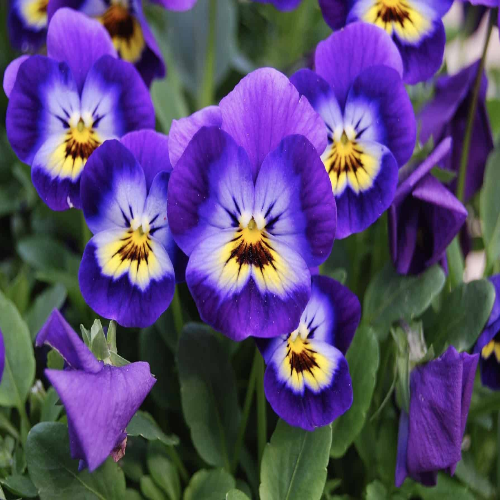

encode done


In [ ]:
Steganography() #encode image 

Image Steganography 
 1. Encode the data 
 2. Decode the data 
 Your input is: 2

Decoding....
Enter the name of the steganographed image that you want to decode (with extension) :/content/flower_encoded.png
The Steganographed image is as shown below: 


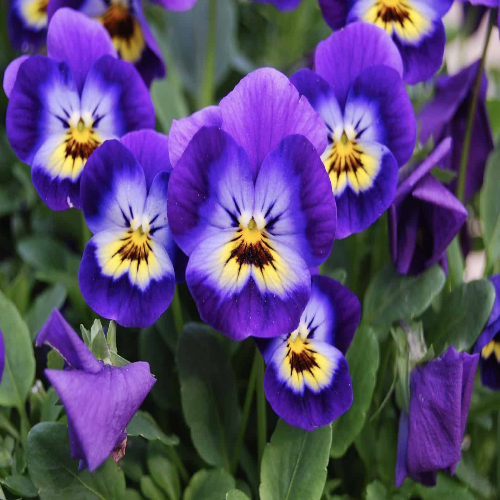

Decoded message is: THIS IS A SECRET CODE HERE: 1234


In [ ]:
Steganography() #decode image 

# Encode / Decode a picture within a picture

In [ ]:
import click
from PIL import Image


class Steganography:
    @staticmethod
    def __int_to_bin(rgb):
        """Convert an integer tuple to a binary (string) tuple.
        :param rgb: An integer tuple (e.g. (220, 110, 96))
        :return: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        """
        r, g, b = rgb
        return (f'{r:08b}',
                f'{g:08b}',
                f'{b:08b}')

    @staticmethod
    def __bin_to_int(rgb):
        """Convert a binary (string) tuple to an integer tuple.
        :param rgb: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :return: Return an int tuple (e.g. (220, 110, 96))
        """
        r, g, b = rgb
        return (int(r, 2),
                int(g, 2),
                int(b, 2))

    @staticmethod
    def __merge_rgb(rgb1, rgb2):
        """Merge two RGB tuples.
        :param rgb1: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :param rgb2: Another string tuple
        (e.g. ("00101010", "11101011", "00010110"))
        :return: An integer tuple with the two RGB values merged.
        """
        r1, g1, b1 = rgb1
        r2, g2, b2 = rgb2
        rgb = (r1[:4] + r2[:4],
               g1[:4] + g2[:4],
               b1[:4] + b2[:4])
        return rgb

    @staticmethod
    def merge(img1, img2):
        """Merge two images. The second one will be merged into the first one.
        :param img1: First image
        :param img2: Second image
        :return: A new merged image.
        """

        # Check the images dimensions
        if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
            raise ValueError('Image 2 should not be larger than Image 1!')

        # Get the pixel map of the two images
        pixel_map1 = img1.load()
        pixel_map2 = img2.load()

        # Create a new image that will be outputted
        new_image = Image.new(img1.mode, img1.size)
        pixels_new = new_image.load()

        for i in range(img1.size[0]):
            for j in range(img1.size[1]):
                rgb1 = Steganography.__int_to_bin(pixel_map1[i, j])

                # Use a black pixel as default
                rgb2 = Steganography.__int_to_bin((0, 0, 0))

                # Check if the pixel map position is valid for the second image
                if i < img2.size[0] and j < img2.size[1]:
                    rgb2 = Steganography.__int_to_bin(pixel_map2[i, j])

                # Merge the two pixels and convert it to a integer tuple
                rgb = Steganography.__merge_rgb(rgb1, rgb2)

                pixels_new[i, j] = Steganography.__bin_to_int(rgb)

        return new_image

    @staticmethod
    def unmerge(img):
        """Unmerge an image.
        :param img: The input image.
        :return: The unmerged/extracted image.
        """

        # Load the pixel map
        pixel_map = img.load()

        # Create the new image and load the pixel map
        new_image = Image.new(img.mode, img.size)
        pixels_new = new_image.load()

        # Tuple used to store the image original size
        original_size = img.size

        for i in range(img.size[0]):
            for j in range(img.size[1]):
                # Get the RGB (as a string tuple) from the current pixel
                r, g, b = Steganography.__int_to_bin(pixel_map[i, j])

                # Extract the last 4 bits (corresponding to the hidden image)
                # Concatenate 4 zero bits because we are working with 8 bit
                rgb = (r[4:] + '0000',
                       g[4:] + '0000',
                       b[4:] + '0000')

                # Convert it to an integer tuple
                pixels_new[i, j] = Steganography.__bin_to_int(rgb)

                # If this is a 'valid' position, store it
                # as the last valid position
                if pixels_new[i, j] != (0, 0, 0):
                    original_size = (i + 1, j + 1)

        # Crop the image based on the 'valid' pixels
        new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

        return new_image


choice = input("Do you want to encode or decode a file into the image? Enter either 'encode' or 'decode': ")                     

if choice == 'encode':
    img1 = input("Enter the input image (carrier): ")                # Input image (carrier)                     # Image that will hide another image
    output = input("Enter the output image (or extracted file): ")   # Output image (or extracted file)          # Output image file path
    img2 = input("Enter the file to hide: ")                         # File to hide (if encode)                  # Image that will be hidden
    merged_image = Steganography.merge(Image.open(img1), Image.open(img2))
    merged_image.save(output)
    print('Output file created with merged images.')

if choice == 'decode':
    img = input("Enter file that has data hidden in it: ")
    output = input("Enter the output file where the data will be written: ")
    unmerged_image = Steganography.unmerge(Image.open(img))
    unmerged_image.save(output)
    print("The hidden picture has been outputed to: " + output)



Do you want to encode or decode a file into the image? Enter either 'encode' or 'decode': encode
Enter the input image (carrier): /content/biggerFlower.png
Enter the output image (or extracted file): /content/output.png
Enter the file to hide: /content/flower.png
Output file created with merged images.


In [ ]:
img = input("Enter file that has data hidden in it: ")
output = input("Enter the output file where the data will be written: ")
unmerged_image = Steganography.unmerge(Image.open(img))
unmerged_image.save(output)
print("The hidden picture has been outputed to: " + output)

Enter file that has data hidden in it: /content/output.png
Enter the output file where the data will be written: /content/output2.png
The hidden picture has been outputed to: /content/output2.png


# Encode / Decode a zipped folder within a picture

In [ ]:
import argparse
from zipfile import ZipFile

# Create a new image containing the image and the zip file.

jpgfile = input("Enter the PNG file: ")
zipfile = input("Enter the zipfile: ")
output = input('Enter output location: ')       # new-image.jpg

jpg_file = open(jpgfile, 'rb')
jpg_data = jpg_file.read()
jpg_file.close()

zip_file = open(zipfile, 'rb')
zip_data = zip_file.read()
zip_file.close()

new_file = open(output, 'wb')
new_file.write(jpg_data)
new_file.write(zip_data)
new_file.close()

print("PNG now contains the information. ")

Enter the PNG file: /content/biggerFlower.png
Enter the zipfile: /content/zippedEncoded
Enter output location: /content/output.png
PNG now contains the information. 


In [ ]:
print(' ')
print("Now to decode the file")
print(' ')
#just unzip it?
# opening the zip file in READ mode
with ZipFile(output, 'r') as zip:                                                        #output is the path to where we want to unzip
    zip.printdir() # printing all the contents of the zip file
    print(' ')

    # extracting all the files
    path = input("Enter the location you wish the file to be extracted to: ")           #user chooses a path to extract the secret into
    zip.extractall(path)            
                                                                      
    print('Extracting all the files now...')
    print(' ')
    sleep(1) # pause for effect
    print('Files extracted to: ' + path)

 
Now to decode the file
 
File Name                                             Modified             Size
123124531.txt (ENCODED)                        2022-01-04 16:03:48           35
file2.txt (ENCODED)                            2022-01-04 16:03:26           45
bitshift.txt (ENCODED)                         2022-01-04 16:03:28          286
anotherFileHere.txt (ENCODED)                  2022-01-04 16:03:28           92
file1.txt (ENCODED)                            2022-01-04 16:03:30           45
a file with spaces.txt (ENCODED)               2022-01-04 16:03:32           65
 
Enter the location you wish the file to be extracted to: /content/output2.png
Extracting all the files now...
 
Files extracted to: /content/output2.png
 


# ENCODE / DECODE file inside of picture

In [22]:
#if functionWanting == 'file':
   # print("This function will allow for the hiding of a singular file. ")
choice = input("Do you want to encode or decode a SINGLE file into the image? Enter either 'encode' or 'decode': ")                     

if choice == 'encode':

  img1 = input("Enter the input image (carrier): ")                # Input image (carrier)                     # Image that will hide another image
  output = input("Enter the output image file path: ")             # Output image (or extracted file)          # Output image file path
  fileToHide = input("Enter the file to hide: ")                   # File to hide (if encode)                  # Image that will be hidden

  out = open(output, "wb")
  out.write(open(img1, "rb").read())
  out.write(open(fileToHide, "rb").read())
  out.close()

if choice == 'decode':
  print('Decoding file from picture')
  decode = input("Enter img to decode: ")
  #unzipInPicture()
  #showData(decode)

  #trailer = '49 45 4e 44 ae 42 60 82' # trailer for PNG
  trailer = 'ffd9'                     # trailer for JPG
  # Get trailer offset
  with open(decode, "rb") as cover_secret:
    file = cover_secret.read()
    offset = file.index(bytes.fromhex(trailer))

  # Write cover bytes to output file from offset + trailer length
  with open(decode, "rb") as cover_secret, open("/content/secret.txt", "wb") as secret:
    cover_secret.seek(offset + len(trailer)//2)
    secret.write(cover_secret.read())


Do you want to encode or decode a SINGLE file into the image? Enter either 'encode' or 'decode': decode
Decoding file from picture
Enter img to decode: /content/out2.jpg


# Software all put together / All functionalities (MAIN PROGRAM)

In [29]:
import click
from PIL import Image
import argparse
from zipfile import ZipFile

##############################
## Text in image functions ##
##############################
def messageToBinary(message):
  if type(message) == str:
    return ''.join([ format(ord(i), "08b") for i in message ])
  elif type(message) == bytes or type(message) == np.ndarray:
    return [ format(i, "08b") for i in message ]
  elif type(message) == int or type(message) == np.uint8:
    return format(message, "08b")
  else:
    raise TypeError("Input type not supported")

# Function to hide the secret message into the image
def hideData(image, secret_message):

  # calculate the maximum bytes to encode
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("Maximum bytes to encode:", n_bytes)

  #Check if the number of bytes to encode is less than the maximum bytes in the image
  if len(secret_message) > n_bytes:
      raise ValueError("Error encountered insufficient bytes, need bigger image or less data !!")
  
  secret_message += "#####" # you can use any string as the delimeter

  data_index = 0
  # convert input data to binary format using messageToBinary() fucntion
  binary_secret_msg = messageToBinary(secret_message)

  data_len = len(binary_secret_msg) #Find the length of data that needs to be hidden
  for values in image:
      for pixel in values:
          # convert RGB values to binary format
          r, g, b = messageToBinary(pixel)
          # modify the least significant bit only if there is still data to store
          if data_index < data_len:
              # hide the data into least significant bit of red pixel
              pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # hide the data into least significant bit of green pixel
              pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # hide the data into least significant bit of  blue pixel
              pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          # if data is encoded, just break out of the loop
          if data_index >= data_len:
              break

  return image

def showData(image):
  binary_data = ""
  for values in image:
      for pixel in values:
          r, g, b = messageToBinary(pixel) #convert the red,green and blue values into binary format
          binary_data += r[-1] #extracting data from the least significant bit of red pixel
          binary_data += g[-1] #extracting data from the least significant bit of red pixel
          binary_data += b[-1] #extracting data from the least significant bit of red pixel
  # split by 8-bits
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
  # convert from bits to characters
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      #sleep(.01)                            # will run too fast for the notebook otherwise, can probably change this when implimented outside of the google colab
      if decoded_data[-5:] == "#####": #check if we have reached the delimeter which is "#####"
          break
  # print(decoded_data)
  return decoded_data[:-5] #remove the delimeter to show the original hidden message

# Encode data into image 
def encode_text(): 
  image_name = input("Enter image name(with extension): ") 
  image = cv2.imread(image_name) # Read the input image using OpenCV-Python.
  # It is a library of Python bindings designed to solve computer vision problems. 
  
  #details of the image
  print("The shape of the image is: ",image.shape) # check the shape of image to calculate the number of bytes in it

  resized_image = cv2.resize(image, (500, 500)) # resize the image as per your requirement                                      # might need to fix this here
  
  data = input("Enter data to be encoded : ")                                                                                   # user types in message that they want to hide inside the picture
  if (len(data) == 0): 
    raise ValueError('Data is empty') # Incase the user trys to get smart and enter nothing, smh 
  
  filename = input("Enter the name of new encoded image(with extension): ")
  encoded_image = hideData(image, data) # call the hideData function to hide the secret message into the selected image
  cv2.imwrite(filename, encoded_image)
  print("The original image is as shown below: ")
  cv2_imshow(resized_image) # display the image                                                                                # commented out because gets hung up here for some reason
  print("encode done")

# Decode the data in the image 
def decode_text():
  # read the image that contains the hidden image
  image_name = input("Enter the name of the steganographed image that you want to decode (with extension) :") 
  image = cv2.imread(image_name) #read the image using cv2.imread() 

  print("The Steganographed image is as shown below: ")
  resized_image = cv2.resize(image, (500, 500))  #resize the original image as per your requirement
  cv2_imshow(resized_image) #display the Steganographed image
    
  text = showData(image)
  return text

# Image Steganography         
def Steganography(): 
    a = input("Image Steganography \n 1. Encode the data \n 2. Decode the data \n Your input is: ")
    userinput = int(a)
    if (userinput == 1):
      print("\nEncoding....")
      encode_text() 
          
    elif (userinput == 2):
      print("\nDecoding....") 
      print("Decoded message is: " + decode_text()) 
    else: 
        raise Exception("Enter correct input") 


##############################
## Image in image functions ##
##############################
class Steganography2:
    @staticmethod
    def __int_to_bin(rgb):
        """Convert an integer tuple to a binary (string) tuple.
        :param rgb: An integer tuple (e.g. (220, 110, 96))
        :return: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        """
        r, g, b = rgb
        return (f'{r:08b}',
                f'{g:08b}',
                f'{b:08b}')

    @staticmethod
    def __bin_to_int(rgb):
        """Convert a binary (string) tuple to an integer tuple.
        :param rgb: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :return: Return an int tuple (e.g. (220, 110, 96))
        """
        r, g, b = rgb
        return (int(r, 2),
                int(g, 2),
                int(b, 2))

    @staticmethod
    def __merge_rgb(rgb1, rgb2):
        """Merge two RGB tuples.
        :param rgb1: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :param rgb2: Another string tuple
        (e.g. ("00101010", "11101011", "00010110"))
        :return: An integer tuple with the two RGB values merged.
        """
        r1, g1, b1 = rgb1
        r2, g2, b2 = rgb2
        rgb = (r1[:4] + r2[:4],
               g1[:4] + g2[:4],
               b1[:4] + b2[:4])
        return rgb

    @staticmethod
    def merge(img1, img2):
        """Merge two images. The second one will be merged into the first one.
        :param img1: First image
        :param img2: Second image
        :return: A new merged image.
        """

        # Check the images dimensions
        if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
            raise ValueError('Image 2 should not be larger than Image 1!')

        # Get the pixel map of the two images
        pixel_map1 = img1.load()
        pixel_map2 = img2.load()

        # Create a new image that will be outputted
        new_image = Image.new(img1.mode, img1.size)
        pixels_new = new_image.load()

        for i in range(img1.size[0]):
            for j in range(img1.size[1]):
                rgb1 = Steganography2.__int_to_bin(pixel_map1[i, j])

                # Use a black pixel as default
                rgb2 = Steganography2.__int_to_bin((0, 0, 0))

                # Check if the pixel map position is valid for the second image
                if i < img2.size[0] and j < img2.size[1]:
                    rgb2 = Steganography2.__int_to_bin(pixel_map2[i, j])

                # Merge the two pixels and convert it to a integer tuple
                rgb = Steganography2.__merge_rgb(rgb1, rgb2)

                pixels_new[i, j] = Steganography2.__bin_to_int(rgb)

        return new_image

    @staticmethod
    def unmerge(img):
        """Unmerge an image.
        :param img: The input image.
        :return: The unmerged/extracted image.
        """

        # Load the pixel map
        pixel_map = img.load()

        # Create the new image and load the pixel map
        new_image = Image.new(img.mode, img.size)
        pixels_new = new_image.load()

        # Tuple used to store the image original size
        original_size = img.size

        for i in range(img.size[0]):
            for j in range(img.size[1]):
                # Get the RGB (as a string tuple) from the current pixel
                r, g, b = Steganography2.__int_to_bin(pixel_map[i, j])

                # Extract the last 4 bits (corresponding to the hidden image)
                # Concatenate 4 zero bits because we are working with 8 bit
                rgb = (r[4:] + '0000',
                       g[4:] + '0000',
                       b[4:] + '0000')

                # Convert it to an integer tuple
                pixels_new[i, j] = Steganography2.__bin_to_int(rgb)

                # If this is a 'valid' position, store it
                # as the last valid position
                if pixels_new[i, j] != (0, 0, 0):
                    original_size = (i + 1, j + 1)

        # Crop the image based on the 'valid' pixels
        new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

        return new_image


##############################
## Image in image functions ##
##############################
def encodeSingleFile():
    img1 = input("Enter the input image (carrier): ")                # Input image (carrier)                     # Image that will hide another image
    output = input("Enter the output image file path: ")             # Output image (or extracted file)          # Output image file path
    fileToHide = input("Enter the file to hide: ")                   # File to hide (if encode)                  # Image that will be hidden

    out = open(output, "wb")
    out.write(open(img1, "rb").read())
    out.write(open(fileToHide, "rb").read())
    out.close()

def decodeSingleFile():
    print('Decoding file from picture')
    decode = input("Enter img to decode: ")
    print(' ')
    #unzipInPicture()
    #showData(decode)

    #trailer = '49 45 4e 44 ae 42 60 82' # trailer for PNG                   # IF ERROR SAYING TRAILER NOT FOUND THEN TRY SWITCHING THESE!!!!
    trailer = 'ffd9'                     # trailer for JPG
    # Get trailer offset
    with open(decode, "rb") as cover_secret:
      file = cover_secret.read()
      offset = file.index(bytes.fromhex(trailer))

    print("When entering the output location, be sure that it matches the file type of what is hidden in the photo.")
    print("IF it does not, you could change the filetype after downloading it, but this may cause some problems. ")
    output = input("Enter output location (with extention (.txt, .zip, .pdf etc.)): ")
    # Write cover bytes to output file from offset + trailer length
    with open(decode, "rb") as cover_secret, open(output, "wb") as secret:
      cover_secret.seek(offset + len(trailer)//2)
      secret.write(cover_secret.read())

    print('Image decoded and outputted to the file specified.')
    print(' ')

##############################
## Zip in image functions   ##
##############################
def zipInPicture():
    # Create a new image containing the image and the zip file.
    jpgfile = input("Enter the PNG file (with extention): ")
    zipfile = input("Enter the zipfile: ")
    output = input('Enter output location (be sure to include .png at the end): ')       # new-image.jpg

    jpg_file = open(jpgfile, 'rb')
    jpg_data = jpg_file.read()
    jpg_file.close()

    zip_file = open(zipfile, 'rb')
    zip_data = zip_file.read()
    zip_file.close()

    new_file = open(output, 'wb')
    new_file.write(jpg_data)
    new_file.write(zip_data)
    new_file.close()

    print("PNG now contains the information. ")

def unzipInPicture():
    print(' ')
    output = input("Enter the carrier photo that contains the hidden zip file: ")
    print(' ')
    #just unzip it?
    # opening the zip file in READ mode
    with ZipFile(output, 'r') as zip:                                                        #output is the path to where we want to unzip
        print("The file contains this hidden zip folder containing these items: ")
        zip.printdir() # printing all the contents of the zip file
        print(' ')

        # extracting all the files
        path = input("Enter the location you wish the file to be extracted to: ")           #user chooses a path to extract the secret into
        zip.extractall(path)            
                                                                          
        print('Extracting all the files now...')
        print(' ')
        sleep(1) # pause for effect
        print('Files extracted to: ' + path)

##############################
## Help Function            ##
##############################
def help():
    print("Welcome to the help documentation for this program.")
    print("This program has three main functions: ")
    print('1. hiding cleartext within a photo ')
    print('2. hiding a photo within another photo')
    print('3. hiding a SINGLE file within a photo')    
    print('4. hiding a zip file within a photo')
    print(' ')
    print('To run this program simple choose one of these three functions, and furthermore choose either decode / encode. ')
    print('If you are passing encoded pictures between two people, it is important that each uses this program, and correctly uses the appropriate function')


############################
##      MAIN FUNCTION     ##
############################
print("Welcome to the steganography program that hides data inside a carrier photo.")
print("You can hide text, another photo, a SINGLE file, or an entire zipped folder that contains any file type. ")
print("You can also type 'help' for more information.")
functionWanting = input("Enter 'text', 'photo', 'file' or 'zip': ")

if functionWanting == 'text': 
  Steganography()

elif functionWanting == 'photo':
  print('You have chosen to complete stego operations with a photo within a photo. Please note that this operation can take a few mins to complete.')
  print(' ')
  choice = input("Do you want to encode or decode a file into the image? Enter either 'encode' or 'decode': ")                     

  if choice == 'encode':
      img1 = input("Enter the input image (carrier): ")                # Input image (carrier)                     # Image that will hide another image
      output = input("Enter the output image (or extracted file): ")   # Output image (or extracted file)          # Output image file path
      img2 = input("Enter the file to hide: ")                         # File to hide (if encode)                  # Image that will be hidden
      merged_image = Steganography2.merge(Image.open(img1), Image.open(img2))
      merged_image.save(output)
      print('Output file created with merged images.')

  if choice == 'decode':
      img = input("Enter file that has data hidden in it: ")
      output = input("Enter the output file where the data will be written: ")
      unmerged_image = Steganography2.unmerge(Image.open(img))
      unmerged_image.save(output)
      print("The hidden picture has been outputed to: " + output)

elif functionWanting == 'file':
  print("This function will allow for the hiding of a singular file. ")
  choice = input("Do you want to encode or decode a SINGLE file into the image? Enter either 'encode' or 'decode': ")                     

  if choice == 'encode':
    encodeSingleFile()

  if choice == 'decode':
    decodeSingleFile()

elif functionWanting == 'zip':
  choice = input("Do you want to encode or decode a file into the image? Enter either 'encode' or 'decode': ")

  if choice == 'encode':
      zipInPicture()
  if choice == 'decode':
    print("Do you want to unzip the dir directly from the photo or extract it as a zip file only? ")
    zipOrNo = input("Enter 'unzip' to extract and unzip the hidden dir OR type 'zip' to extract and keep as hidden: ")
    if zipOrNo == 'unzip':
      unzipInPicture()         # extracts the file and unzips it all in one step
    elif zipOrNo == 'zip':
      decodeSingleFile()       #extracts the file and keeps it zipped
    else:
      print("You did not enter the correct statement. ")

elif functionWanting == 'help':
  help()

else:
  print("Please enter a valid choice. ")



Welcome to the steganography program that hides data inside a carrier photo.
You can hide text, another photo, a SINGLE file, or an entire zipped folder that contains any file type. 
You can also type 'help' for more information.
Enter 'text', 'photo', 'file' or 'zip': h
Please enter a valid choice. 
